# Lab Assignment Five: Wide and Deep Network Architectures

Group: Benjamin Kuo, Nicholas Benso

## Dataset Selection

Select a dataset similarly to lab one. That is, the dataset must be table data. In terms of generalization performance, it is helpful to have a large dataset for building a wide and deep network. It is also helpful to have many different categorical features to create the embeddings and cross-product embeddings. It is fine to perform binary classification, multi-class classification, or regression.


## Preparation (4 points total)
[1 points] Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis. Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created). 

[1 points] Identify groups of features in your data that should be combined into cross-product features. Provide justification for why these features should be crossed (or why some features should not be crossed). 

[1 points] Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.

[1 points] Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Argue why your cross validation method is a realistic mirroring of how an algorithm would be used in practice. 


In [2]:
import os
current_dir = os.getcwd()
print(current_dir) 

C:\Users\nicho\ML_Lab5


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit
import sys


# data - https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers

df = pd.read_csv(current_dir + "//BankChurners.csv") # read in the csv file

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [4]:
del df['CLIENTNUM']
del df['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1']
del df['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

In [5]:
from sklearn.model_selection import StratifiedKFold

X = df.drop(columns=['Attrition_Flag'])
y = df['Attrition_Flag']

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

encoders = dict()
categorical_headers = ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']

for col in categorical_headers+['Attrition_Flag']:
    df_train[col] = df_train[col].str.strip()
    df_test[col] = df_test[col].str.strip()
    
    if col=="Attrition_Flag":
        # special case the target, just replace the column
        tmp = LabelEncoder()
        df_train[col] = tmp.fit_transform(df_train[col])
        df_test[col] = tmp.transform(df_test[col])
    else:
        # integer encode strings that are features
        encoders[col] = LabelEncoder() # save the encoder
        df_train[col+'_int'] = encoders[col].fit_transform(df_train[col])
        df_test[col+'_int'] = encoders[col].transform(df_test[col])


numeric_headers = ["Customer_Age", "Dependent_count", "Months_on_book","Total_Relationship_Count", "Months_Inactive_12_mon", "Contacts_Count_12_mon", "Credit_Limit", "Total_Revolving_Bal", "Avg_Open_To_Buy", "Total_Amt_Chng_Q4_Q1", "Total_Trans_Amt", "Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1", "Avg_Utilization_Ratio"]

ss = StandardScaler()
df_train[numeric_headers] = ss.fit_transform(df_train[numeric_headers].values)
df_test[numeric_headers] = ss.transform(df_test[numeric_headers].values)

categorical_headers_ints = [x+'_int' for x in categorical_headers]
feature_columns = categorical_headers_ints+numeric_headers

X_train = df_train[feature_columns].to_numpy()
X_test = df_test[feature_columns].to_numpy()

y_train = df_train['Attrition_Flag'].values.astype(np.int32)
y_test = df_test['Attrition_Flag'].values.astype(np.int32)

## Modeling (5 points total)
[2 points] Create at least three combined wide and deep networks to classify your data using Keras. Visualize the performance of the network on the training data and validation data in the same plot versus the training iterations. Note: use the "history" return parameter that is part of Keras "fit" function to easily access this data.

[2 points] Investigate generalization performance by altering the number of layers in the deep branch of the network. Try at least two different number of layers. Use the method of cross validation and evaluation metric that you argued for at the beginning of the lab to select the number of layers that performs superiorly. 

[1 points] Compare the performance of your best wide and deep network to a standard multi-layer perceptron (MLP). Alternatively, you can compare to a network without the wide branch (i.e., just the deep network). .  


## Deep and Wide Network #1

In [27]:
from sklearn import metrics as mt
import tensorflow as tf
from tensorflow import keras
import os
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import concatenate

cross_columns = [['Education_Level', 'Income_Category'],['Gender', 'Marital_Status']]

# cross each set of columns in the list above
cross_col_df_names = []
for cols_list in cross_columns:
    # encode as ints for the embedding
    enc = LabelEncoder()
    
    # 1. create crossed labels by join operation
    X_crossed_train = df_train[cols_list].apply(lambda x: '_'.join(x), axis=1)
    X_crossed_test = df_test[cols_list].apply(lambda x: '_'.join(x), axis=1)
    
    # get a nice name for this new crossed column
    cross_col_name = '_'.join(cols_list)
    
    # 2. encode as integers, stacking all possibilities
    enc.fit(np.hstack((X_crossed_train.to_numpy(),  X_crossed_test.to_numpy())))
    
    # 3. Save into dataframe with new name
    df_train[cross_col_name] = enc.transform(X_crossed_train)
    df_test[cross_col_name] = enc.transform(X_crossed_test)
    
    # Save the encoder used here for later:
    encoders[cross_col_name] = enc
    
    # keep track of the new names of the crossed columns
    cross_col_df_names.append(cross_col_name) 
    
cross_col_df_names

['Education_Level_Income_Category', 'Gender_Marital_Status']

In [28]:
# get crossed columns
X_train_crossed = df_train[cross_col_df_names].to_numpy()
X_test_crossed = df_test[cross_col_df_names].to_numpy()

# save categorical features
X_train_cat = df_train[categorical_headers_ints].to_numpy() 
X_test_cat = df_test[categorical_headers_ints].to_numpy() 

# and save off the numeric features
X_train_num =  df_train[numeric_headers].to_numpy()
X_test_num = df_test[numeric_headers].to_numpy()


# we need to create separate lists for each branch
crossed_outputs = []

# CROSSED DATA INPUT
input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='wide_inputs')
for idx,col in enumerate(cross_col_df_names):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(df_train[col].max(),df_test[col].max())+1
    N = len(encoders[col].classes_)
    N_reduced = int(np.sqrt(N))
    
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_crossed, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=N_reduced, 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = concatenate(crossed_outputs, name='wide_concat')

# reset this input branch
all_deep_branch_outputs = []


# CATEGORICAL DATA INPUT
input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
for idx,col in enumerate(categorical_headers_ints):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(df_train[col].max(),df_test[col].max())+1
    N_reduced = int(np.sqrt(N))
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=N_reduced, 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    all_deep_branch_outputs.append(x)
    
# NUMERIC DATA INPUT
# create dense input branch for numeric
input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
x_dense = Dense(units=20, activation='relu',name='num_1')(input_num)
    
all_deep_branch_outputs.append(x_dense)


# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
    
# merge the deep and wide branch
final_branch = concatenate([wide_branch, deep_branch],
                           name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

model = Model(inputs=[input_crossed,input_cat,input_num], 
              outputs=final_branch)

In [29]:
from tensorflow.keras.utils import plot_model

plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [30]:
%%time

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history = model.fit([X_train_crossed,X_train_cat,X_train_num],
                    y_train, 
                    epochs=15, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test))

yhat = np.round(model.predict([X_test_crossed,X_test_cat,X_test_num]))
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

Epoch 1/15
285/285 [==============================] - 4s 4ms/step - loss: 0.1084 - accuracy: 0.8613 - val_loss: 0.0840 - val_accuracy: 0.8903
Epoch 2/15
285/285 [==============================] - 1s 3ms/step - loss: 0.0689 - accuracy: 0.9092 - val_loss: 0.0688 - val_accuracy: 0.9091
Epoch 3/15
285/285 [==============================] - 1s 4ms/step - loss: 0.0602 - accuracy: 0.9209 - val_loss: 0.0612 - val_accuracy: 0.9121
Epoch 4/15
285/285 [==============================] - 1s 3ms/step - loss: 0.0551 - accuracy: 0.9277 - val_loss: 0.0568 - val_accuracy: 0.9219
Epoch 5/15
285/285 [==============================] - 1s 3ms/step - loss: 0.0523 - accuracy: 0.9325 - val_loss: 0.0524 - val_accuracy: 0.9338
Epoch 6/15
285/285 [==============================] - 1s 3ms/step - loss: 0.0495 - accuracy: 0.9349 - val_loss: 0.0529 - val_accuracy: 0.9289
Epoch 7/15
285/285 [==============================] - 1s 4ms/step - loss: 0.0482 - accuracy: 0.9386 - val_loss: 0.0478 - val_accuracy: 0.9368
Epoch 

(0.0, 0.25)

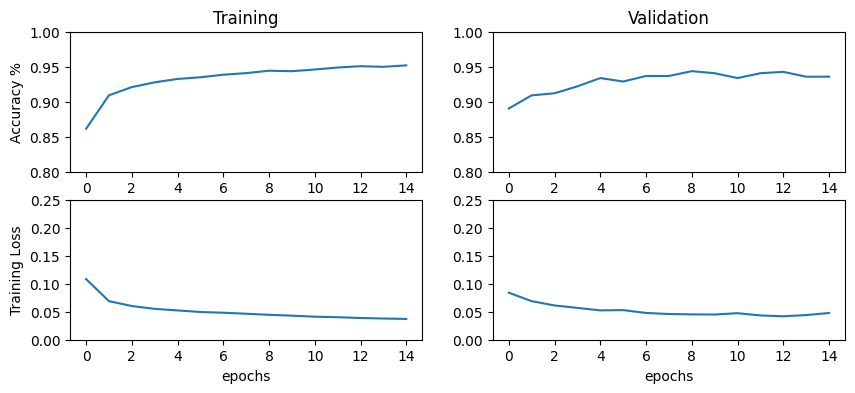

In [31]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
plt.ylim([0.8,1])

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_accuracy'])
plt.title('Validation')
plt.ylim([0.8,1])

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')
plt.ylim([0,0.25])

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylim([0,0.25])

## Deep and Wide Network #2

In [32]:
cross_columns = [['Education_Level', 'Income_Category','Gender', 'Marital_Status']]

# cross each set of columns in the list above
cross_col_df_names = []
for cols_list in cross_columns:
    # encode as ints for the embedding
    enc = LabelEncoder()
    
    # 1. create crossed labels by join operation
    X_crossed_train = df_train[cols_list].apply(lambda x: '_'.join(x), axis=1)
    X_crossed_test = df_test[cols_list].apply(lambda x: '_'.join(x), axis=1)
    
    # get a nice name for this new crossed column
    cross_col_name = '_'.join(cols_list)
    
    # 2. encode as integers, stacking all possibilities
    enc.fit(np.hstack((X_crossed_train.to_numpy(),  X_crossed_test.to_numpy())))
    
    # 3. Save into dataframe with new name
    df_train[cross_col_name] = enc.transform(X_crossed_train)
    df_test[cross_col_name] = enc.transform(X_crossed_test)
    
    # Save the encoder used here for later:
    encoders[cross_col_name] = enc
    
    # keep track of the new names of the crossed columns
    cross_col_df_names.append(cross_col_name) 
    
cross_col_df_names

['Education_Level_Income_Category_Gender_Marital_Status']

In [33]:
# get crossed columns
X_train_crossed = df_train[cross_col_df_names].to_numpy()
X_test_crossed = df_test[cross_col_df_names].to_numpy()

# save categorical features
X_train_cat = df_train[categorical_headers_ints].to_numpy() 
X_test_cat = df_test[categorical_headers_ints].to_numpy() 

# and save off the numeric features
X_train_num =  df_train[numeric_headers].to_numpy()
X_test_num = df_test[numeric_headers].to_numpy()


# we need to create separate lists for each branch
crossed_outputs = []

# CROSSED DATA INPUT
input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='wide_inputs')
for idx,col in enumerate(cross_col_df_names):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(df_train[col].max(),df_test[col].max())+1
    N = len(encoders[col].classes_)
    N_reduced = int(np.sqrt(N))
    
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_crossed, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=N_reduced, 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = concatenate(crossed_outputs, name='wide_concat')

# reset this input branch
all_deep_branch_outputs = []


# CATEGORICAL DATA INPUT
input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
for idx,col in enumerate(categorical_headers_ints):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(df_train[col].max(),df_test[col].max())+1
    N_reduced = int(np.sqrt(N))
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=N_reduced, 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    all_deep_branch_outputs.append(x)
    
# NUMERIC DATA INPUT
# create dense input branch for numeric
input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
x_dense = Dense(units=20, activation='relu',name='num_1')(input_num)
    
all_deep_branch_outputs.append(x_dense)


# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
    
# merge the deep and wide branch
final_branch = concatenate([wide_branch, deep_branch],
                           name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

model = Model(inputs=[input_crossed,input_cat,input_num], 
              outputs=final_branch)

In [34]:
plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [35]:
%%time

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history = model.fit([X_train_crossed,X_train_cat,X_train_num],
                    y_train, 
                    epochs=15, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test))

yhat = np.round(model.predict([X_test_crossed,X_test_cat,X_test_num]))
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

Epoch 1/15
285/285 [==============================] - 3s 4ms/step - loss: 0.1154 - accuracy: 0.8535 - val_loss: 0.0879 - val_accuracy: 0.8923
Epoch 2/15
285/285 [==============================] - 1s 3ms/step - loss: 0.0744 - accuracy: 0.9032 - val_loss: 0.0746 - val_accuracy: 0.9012
Epoch 3/15
285/285 [==============================] - 1s 3ms/step - loss: 0.0609 - accuracy: 0.9202 - val_loss: 0.0622 - val_accuracy: 0.9140
Epoch 4/15
285/285 [==============================] - 1s 4ms/step - loss: 0.0527 - accuracy: 0.9317 - val_loss: 0.0567 - val_accuracy: 0.9200
Epoch 5/15
285/285 [==============================] - 1s 3ms/step - loss: 0.0472 - accuracy: 0.9400 - val_loss: 0.0520 - val_accuracy: 0.9308
Epoch 6/15
285/285 [==============================] - 1s 3ms/step - loss: 0.0450 - accuracy: 0.9400 - val_loss: 0.0516 - val_accuracy: 0.9279
Epoch 7/15
285/285 [==============================] - 1s 3ms/step - loss: 0.0430 - accuracy: 0.9453 - val_loss: 0.0484 - val_accuracy: 0.9328
Epoch 

(0.0, 0.25)

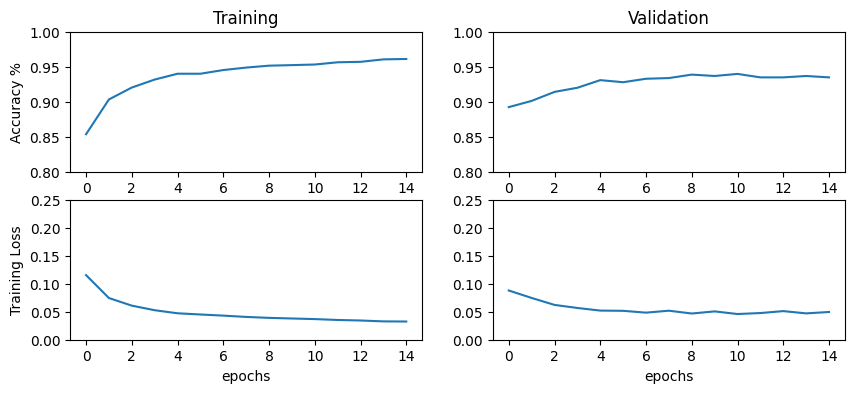

In [36]:
%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
plt.ylim([0.8,1])

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_accuracy'])
plt.title('Validation')
plt.ylim([0.8,1])

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')
plt.ylim([0,0.25])

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylim([0,0.25])

## Deep and Wide Network #3

In [37]:
cross_columns = [['Education_Level', 'Income_Category','Gender', 'Marital_Status']]

# cross each set of columns in the list above
cross_col_df_names = []
for cols_list in cross_columns:
    # encode as ints for the embedding
    enc = LabelEncoder()
    
    # 1. create crossed labels by join operation
    X_crossed_train = df_train[cols_list].apply(lambda x: '_'.join(x), axis=1)
    X_crossed_test = df_test[cols_list].apply(lambda x: '_'.join(x), axis=1)
    
    # get a nice name for this new crossed column
    cross_col_name = '_'.join(cols_list)
    
    # 2. encode as integers, stacking all possibilities
    enc.fit(np.hstack((X_crossed_train.to_numpy(),  X_crossed_test.to_numpy())))
    
    # 3. Save into dataframe with new name
    df_train[cross_col_name] = enc.transform(X_crossed_train)
    df_test[cross_col_name] = enc.transform(X_crossed_test)
    
    # Save the encoder used here for later:
    encoders[cross_col_name] = enc
    
    # keep track of the new names of the crossed columns
    cross_col_df_names.append(cross_col_name) 
    
cross_col_df_names

['Education_Level_Income_Category_Gender_Marital_Status']

In [38]:
# get crossed columns
X_train_crossed = df_train[cross_col_df_names].to_numpy()
X_test_crossed = df_test[cross_col_df_names].to_numpy()

# save categorical features
X_train_cat = df_train[categorical_headers_ints].to_numpy() 
X_test_cat = df_test[categorical_headers_ints].to_numpy() 

# and save off the numeric features
X_train_num =  df_train[numeric_headers].to_numpy()
X_test_num = df_test[numeric_headers].to_numpy()


# we need to create separate lists for each branch
crossed_outputs = []

# CROSSED DATA INPUT
input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='wide_inputs')
for idx,col in enumerate(cross_col_df_names):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(df_train[col].max(),df_test[col].max())+1
    N = len(encoders[col].classes_)
    N_reduced = int(np.sqrt(N))
    
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_crossed, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=N_reduced, 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = concatenate(crossed_outputs, name='wide_concat')

# reset this input branch
all_deep_branch_outputs = []


# CATEGORICAL DATA INPUT
input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
for idx,col in enumerate(categorical_headers_ints):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(df_train[col].max(),df_test[col].max())+1
    N_reduced = int(np.sqrt(N))
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=N_reduced, 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    all_deep_branch_outputs.append(x)
    
# NUMERIC DATA INPUT
# create dense input branch for numeric
input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
x_dense = Dense(units=20, activation='relu',name='num_1')(input_num)
    
all_deep_branch_outputs.append(x_dense)


# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=500,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=250,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=100,activation='relu', name='deep3')(deep_branch)
    
# merge the deep and wide branch
final_branch = concatenate([wide_branch, deep_branch],
                           name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

model = Model(inputs=[input_crossed,input_cat,input_num], 
              outputs=final_branch)

In [39]:
plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [40]:
%%time

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history = model.fit([X_train_crossed,X_train_cat,X_train_num],
                    y_train, 
                    epochs=15, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test))

yhat = np.round(model.predict([X_test_crossed,X_test_cat,X_test_num]))
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

Epoch 1/15
285/285 [==============================] - 4s 6ms/step - loss: 0.0794 - accuracy: 0.9017 - val_loss: 0.0641 - val_accuracy: 0.9121
Epoch 2/15
285/285 [==============================] - 2s 7ms/step - loss: 0.0583 - accuracy: 0.9227 - val_loss: 0.0687 - val_accuracy: 0.9091
Epoch 3/15
285/285 [==============================] - 2s 6ms/step - loss: 0.0523 - accuracy: 0.9306 - val_loss: 0.0512 - val_accuracy: 0.9308
Epoch 4/15
285/285 [==============================] - 2s 7ms/step - loss: 0.0465 - accuracy: 0.9379 - val_loss: 0.0579 - val_accuracy: 0.9180
Epoch 5/15
285/285 [==============================] - 2s 6ms/step - loss: 0.0437 - accuracy: 0.9434 - val_loss: 0.0615 - val_accuracy: 0.9200
Epoch 6/15
285/285 [==============================] - 2s 8ms/step - loss: 0.0412 - accuracy: 0.9450 - val_loss: 0.0490 - val_accuracy: 0.9308
Epoch 7/15
285/285 [==============================] - 2s 5ms/step - loss: 0.0385 - accuracy: 0.9499 - val_loss: 0.0482 - val_accuracy: 0.9348
Epoch 

(0.0, 0.25)

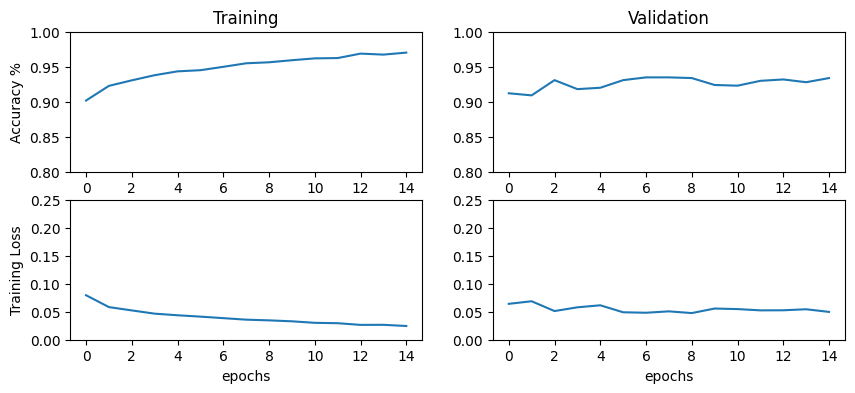

In [41]:
%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
plt.ylim([0.8,1])

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_accuracy'])
plt.title('Validation')
plt.ylim([0.8,1])

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')
plt.ylim([0,0.25])

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylim([0,0.25])

### Altered Model 1: 5 Layers

In [43]:
# now concatenate the outputs and add a fully connected layer
wide_branch = concatenate(crossed_outputs, name='wide_concat')

# reset this input branch
all_deep_branch_outputs = []


# CATEGORICAL DATA INPUT
input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
for idx,col in enumerate(categorical_headers_ints):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(df_train[col].max(),df_test[col].max())+1
    N_reduced = int(np.sqrt(N))
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=N_reduced, 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    all_deep_branch_outputs.append(x)
    
# NUMERIC DATA INPUT
# create dense input branch for numeric
input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
x_dense = Dense(units=20, activation='relu',name='num_1')(input_num)
    
all_deep_branch_outputs.append(x_dense)


# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=500,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=250,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=100,activation='relu', name='deep3')(deep_branch)
deep_branch = Dense(units=50,activation='relu', name='deep4')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep5')(deep_branch)
    
# merge the deep and wide branch
final_branch = concatenate([wide_branch, deep_branch],
                           name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

model = Model(inputs=[input_crossed,input_cat,input_num], 
              outputs=final_branch)

In [44]:
from tensorflow.keras.utils import plot_model

plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [45]:
%%time

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history1 = model.fit([X_train_crossed,X_train_cat,X_train_num],
                    y_train, 
                    epochs=15, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test))

yhat = np.round(model.predict([X_test_crossed,X_test_cat,X_test_num]))
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

Epoch 1/15
285/285 [==============================] - 5s 7ms/step - loss: 0.0856 - accuracy: 0.8875 - val_loss: 0.0719 - val_accuracy: 0.8982
Epoch 2/15
285/285 [==============================] - 2s 6ms/step - loss: 0.0597 - accuracy: 0.9204 - val_loss: 0.0630 - val_accuracy: 0.9091
Epoch 3/15
285/285 [==============================] - 2s 6ms/step - loss: 0.0531 - accuracy: 0.9308 - val_loss: 0.0585 - val_accuracy: 0.9190
Epoch 4/15
285/285 [==============================] - 2s 6ms/step - loss: 0.0483 - accuracy: 0.9359 - val_loss: 0.0553 - val_accuracy: 0.9249
Epoch 5/15
285/285 [==============================] - 2s 6ms/step - loss: 0.0443 - accuracy: 0.9422 - val_loss: 0.0518 - val_accuracy: 0.9289
Epoch 6/15
285/285 [==============================] - 2s 6ms/step - loss: 0.0423 - accuracy: 0.9430 - val_loss: 0.0514 - val_accuracy: 0.9279
Epoch 7/15
285/285 [==============================] - 2s 7ms/step - loss: 0.0395 - accuracy: 0.9482 - val_loss: 0.0534 - val_accuracy: 0.9239
Epoch 

(0.0, 0.25)

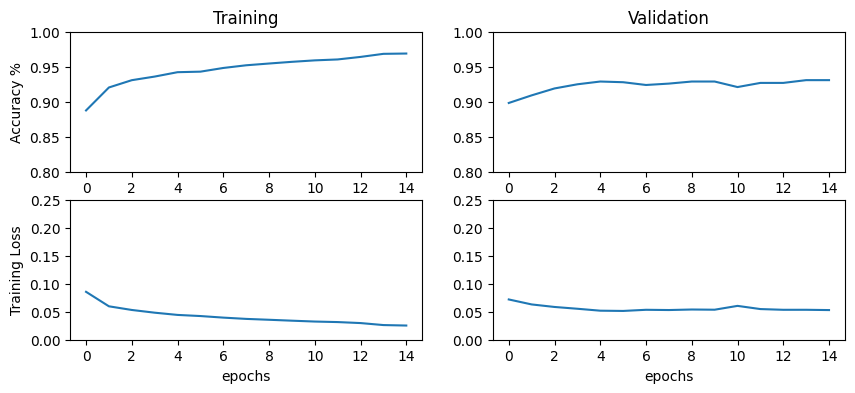

In [46]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history1.history['accuracy'])
plt.ylim([0.8,1])

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history1.history['val_accuracy'])
plt.title('Validation')
plt.ylim([0.8,1])

plt.subplot(2,2,3)
plt.plot(history1.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')
plt.ylim([0,0.25])

plt.subplot(2,2,4)
plt.plot(history1.history['val_loss'])
plt.xlabel('epochs')
plt.ylim([0,0.25])

### Altered Model 2: 2 Layers

In [48]:
# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=500,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=250,activation='relu', name='deep2')(deep_branch)
    
# merge the deep and wide branch
final_branch = concatenate([wide_branch, deep_branch],
                           name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

model = Model(inputs=[input_crossed,input_cat,input_num], 
              outputs=final_branch)


model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history2 = model.fit([X_train_crossed,X_train_cat,X_train_num],
                    y_train, 
                    epochs=15, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test))

yhat = np.round(model.predict([X_test_crossed,X_test_cat,X_test_num]))
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

Epoch 1/15
285/285 [==============================] - 4s 6ms/step - loss: 0.0591 - accuracy: 0.9233 - val_loss: 0.0477 - val_accuracy: 0.9358
Epoch 2/15
285/285 [==============================] - 1s 5ms/step - loss: 0.0445 - accuracy: 0.9412 - val_loss: 0.0497 - val_accuracy: 0.9308
Epoch 3/15
285/285 [==============================] - 2s 5ms/step - loss: 0.0402 - accuracy: 0.9483 - val_loss: 0.0488 - val_accuracy: 0.9348
Epoch 4/15
285/285 [==============================] - 2s 5ms/step - loss: 0.0368 - accuracy: 0.9516 - val_loss: 0.0492 - val_accuracy: 0.9368
Epoch 5/15
285/285 [==============================] - 1s 5ms/step - loss: 0.0349 - accuracy: 0.9551 - val_loss: 0.0503 - val_accuracy: 0.9298
Epoch 6/15
285/285 [==============================] - 2s 7ms/step - loss: 0.0327 - accuracy: 0.9582 - val_loss: 0.0481 - val_accuracy: 0.9318
Epoch 7/15
285/285 [==============================] - 2s 6ms/step - loss: 0.0299 - accuracy: 0.9623 - val_loss: 0.0433 - val_accuracy: 0.9457
Epoch 

(0.0, 0.25)

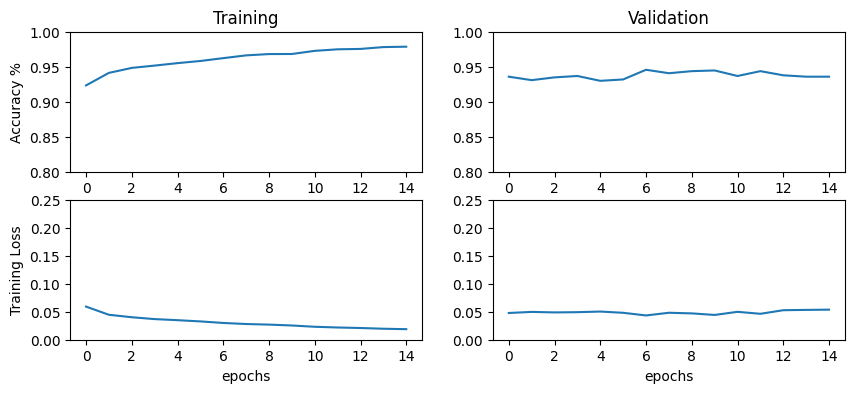

In [49]:
%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history2.history['accuracy'])
plt.ylim([0.8,1])

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history2.history['val_accuracy'])
plt.title('Validation')
plt.ylim([0.8,1])

plt.subplot(2,2,3)
plt.plot(history2.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')
plt.ylim([0,0.25])

plt.subplot(2,2,4)
plt.plot(history2.history['val_loss'])
plt.xlabel('epochs')
plt.ylim([0,0.25])

### Comparison to Model Without Wide Branch

In [50]:
# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=500,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=250,activation='relu', name='deep2')(deep_branch)
    
# merge the deep and wide branch
final_branch = concatenate([deep_branch],
                           name='deep')
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

model = Model(inputs=[input_crossed,input_cat,input_num], 
              outputs=final_branch)


model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history3 = model.fit([X_train_crossed,X_train_cat,X_train_num],
                    y_train, 
                    epochs=15, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test))

yhat = np.round(model.predict([X_test_crossed,X_test_cat,X_test_num]))
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

Epoch 1/15
285/285 [==============================] - 4s 6ms/step - loss: 0.0565 - accuracy: 0.9272 - val_loss: 0.0464 - val_accuracy: 0.9417
Epoch 2/15
285/285 [==============================] - 2s 5ms/step - loss: 0.0421 - accuracy: 0.9438 - val_loss: 0.0384 - val_accuracy: 0.9506
Epoch 3/15
285/285 [==============================] - 1s 5ms/step - loss: 0.0375 - accuracy: 0.9500 - val_loss: 0.0423 - val_accuracy: 0.9417
Epoch 4/15
285/285 [==============================] - 2s 6ms/step - loss: 0.0355 - accuracy: 0.9528 - val_loss: 0.0408 - val_accuracy: 0.9417
Epoch 5/15
285/285 [==============================] - 1s 5ms/step - loss: 0.0325 - accuracy: 0.9582 - val_loss: 0.0410 - val_accuracy: 0.9447
Epoch 6/15
285/285 [==============================] - 2s 6ms/step - loss: 0.0312 - accuracy: 0.9605 - val_loss: 0.0394 - val_accuracy: 0.9476
Epoch 7/15
285/285 [==============================] - 1s 5ms/step - loss: 0.0286 - accuracy: 0.9638 - val_loss: 0.0397 - val_accuracy: 0.9516
Epoch 

(0.0, 0.25)

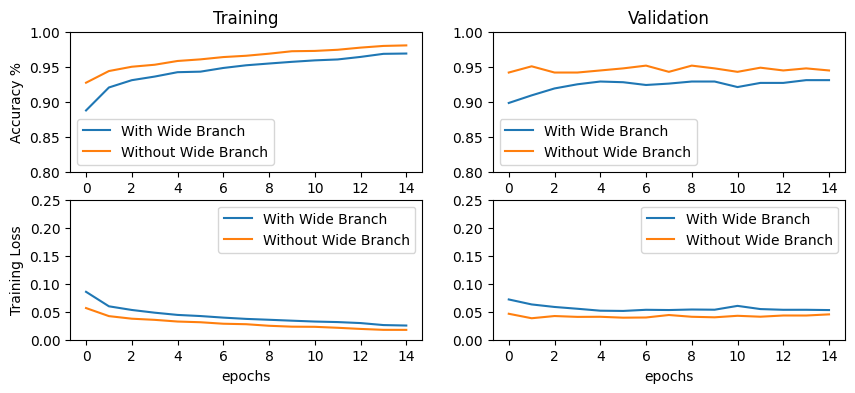

In [51]:
%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history1.history['accuracy'])
plt.plot(history3.history['accuracy'])
plt.legend(["With Wide Branch","Without Wide Branch"])
plt.ylim([0.8,1])

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history1.history['val_accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.legend(["With Wide Branch","Without Wide Branch"])
plt.title('Validation')
plt.ylim([0.8,1])

plt.subplot(2,2,3)
plt.plot(history1.history['loss'])
plt.plot(history3.history['loss'])
plt.legend(["With Wide Branch","Without Wide Branch"])
plt.ylabel('Training Loss')
plt.xlabel('epochs')
plt.ylim([0,0.25])

plt.subplot(2,2,4)
plt.plot(history1.history['val_loss'])
plt.plot(history3.history['val_loss'])
plt.legend(["With Wide Branch","Without Wide Branch"])
plt.xlabel('epochs')
plt.ylim([0,0.25])

## Exceptional Work (1 points total)
(0.4) The overall quality of the report as a coherent, useful, complete and polished product will be reflected here. Did you support your reasons for creating cross categories? Did you include plots and provide interpretation? Did you justify your choice of metrics?

(0.6) Additional analysis

(5000 level) You have free rein to provide any additional analyses and visualizations appropriate to your data.  Implement additional optimization models or statistical analysis.

 ( 7000 level students - options):
Capture the embedding weights from the deep network and (if needed) perform dimensionality reduction on the output of these embedding layers (only if needed). That is, pass the observations into the network, save the embedded weights (called embeddings), and then perform  dimensionality reduction in order to visualize results. Visualize and explain any clusters in the data.

Use statistical methods to compare the performance of different models.  For classification tasks, you ight compare using the receiver operating characteristic and area under the curve. For regression tasks, you might use use Bland-Altman plots and residual variance calculations